# tf.data.Dataset
merupakan api dari tensorflow

In [10]:
import tensorflow as tf
from keras import datasets
import numpy as np
from matplotlib import pyplot as plt

In [17]:
mnist = datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

5


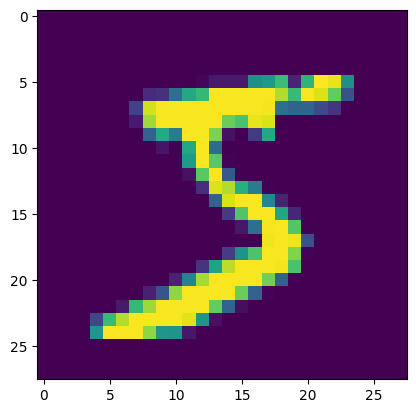

In [19]:
np.set_printoptions(linewidth=200)
plt.imshow(x_train[0])
print(y_train[0])

In [20]:
x_train = x_train / 255.0
y_train = y_train / 255.0

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [25]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train , y_train, epochs=5)

Epoch 1/5


I0000 00:00:1720693241.053213   63460 service.cc:145] XLA service 0x7f3a500039f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720693241.053372   63460 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2024-07-11 17:20:41.075847: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-11 17:20:41.180706: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  56/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0826 - loss: 0.5364  

I0000 00:00:1720693242.208711   63460 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0987 - loss: 0.0328
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0983 - loss: 1.8688e-06
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0987 - loss: 3.0218e-07
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0998 - loss: 9.7035e-08
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0992 - loss: 4.2395e-08


In [28]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.0924 - loss: 8629.1543


[9022.5888671875, 0.09799999743700027]

# TFDS
merupakan sebuah library

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [31]:
tfds.list_builders()        # melihat katalog dataset

2024-07-11 17:38:32.988780: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bridge_data_msr',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech10

In [32]:
dataset = tfds.load('mnist', split='train', shuffle_files=True)
assert isinstance(dataset, tf.data.Dataset)

/home/yelf/pyEnv/tf2.16/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Dl Completed...: 100%|██████████| 5/5 [00:22<00:00,  4.49s/ file]

Dataset mnist downloaded and prepared to /home/yelf/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [33]:
(train_images, train_labels), (test_images, test_labels) = tfds.as_numpy(tfds.load('mnist',
              split = ['train', 'test'],
              batch_size=-1,
              as_supervised=True))

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [36]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

In [37]:
model.fit(train_images, train_labels, batch_size=50, epochs=5)

Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8382 - loss: 0.8030
Epoch 2/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9758 - loss: 0.0829
Epoch 3/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9818 - loss: 0.0650
Epoch 4/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9854 - loss: 0.0555
Epoch 5/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9881 - loss: 0.0500


In [38]:
model.evaluate(test_images, test_labels, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9787 - loss: 0.1067


[0.10539457947015762, 0.9793999791145325]